In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [ ]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#insurance_df = pd.read_sql_query('select * from medicalcosts',con=engine)

insurance_df = pd.DataFrame(engine.connect().execute(text('select * from houseprices')))

# No need for an open connection, because you're only doing a single query
engine.dispose()

insurance_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [ ]:
insurance_df.isnull()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [ ]:
for column_name in insurance_df.columns:
    print("Unique values in column {} are: {}".format(column_name, insurance_df[column_name].unique()))

Unique values in column id are: [   1    2    3 ... 1458 1459 1460]
Unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column mszoning are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column lotfrontage are: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column lotarea are: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values in column street are: ['Pave' 'Grvl']
Unique values in column 

In [ ]:
for column_name in insurance_df.columns:
    print(" {} \n".format(column_name))

 id 

 mssubclass 

 mszoning 

 lotfrontage 

 lotarea 

 street 

 alley 

 lotshape 

 landcontour 

 utilities 

 lotconfig 

 landslope 

 neighborhood 

 condition1 

 condition2 

 bldgtype 

 housestyle 

 overallqual 

 overallcond 

 yearbuilt 

 yearremodadd 

 roofstyle 

 roofmatl 

 exterior1st 

 exterior2nd 

 masvnrtype 

 masvnrarea 

 exterqual 

 extercond 

 foundation 

 bsmtqual 

 bsmtcond 

 bsmtexposure 

 bsmtfintype1 

 bsmtfinsf1 

 bsmtfintype2 

 bsmtfinsf2 

 bsmtunfsf 

 totalbsmtsf 

 heating 

 heatingqc 

 centralair 

 electrical 

 firstflrsf 

 secondflrsf 

 lowqualfinsf 

 grlivarea 

 bsmtfullbath 

 bsmthalfbath 

 fullbath 

 halfbath 

 bedroomabvgr 

 kitchenabvgr 

 kitchenqual 

 totrmsabvgrd 

 functional 

 fireplaces 

 fireplacequ 

 garagetype 

 garageyrblt 

 garagefinish 

 garagecars 

 garagearea 

 garagequal 

 garagecond 

 paveddrive 

 wooddecksf 

 openporchsf 

 enclosedporch 

 threessnporch 

 screenporch 

 poolarea 



In [ ]:
insurance_df.isnull().sum()*100/insurance_df.isnull().count()

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
                   ...    
mosold            0.000000
yrsold            0.000000
saletype          0.000000
salecondition     0.000000
saleprice         0.000000
Length: 81, dtype: float64

In [ ]:
insurance_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#insurance_df.alley = insurance_df.alley.apply(str.strip).replace("", np.nan)
#insurance_df.poolqc = insurance_df.poolqc.apply(str.strip).replace("", np.nan)
#insurance_df.miscfeature = insurance_df.miscfeature.apply(str.strip).replace("", np.nan)
#insurance_df.masvnrtype = insurance_df.masvnrtype.apply(str.strip).replace("", np.nan)
#insurance_df.bsmtqual = insurance_df.bsmtqual.apply(str.strip).replace("", np.nan)
#insurance_df.bsmtcond = insurance_df.bsmtcond.apply(str.strip).replace("", np.nan)
#insurance_df.bsmtexposure = insurance_df.bsmtexposure.apply(str.strip).replace("", np.nan)
#insurance_df.bsmtfintype1 = insurance_df.bsmtfintype1.apply(str.strip).replace("", np.nan)
#insurance_df.bsmtfintype2 = insurance_df.bsmtfintype2.apply(str.strip).replace("", np.nan)
#insurance_df.electrical = insurance_df.electrical.apply(str.strip).replace("", np.nan)
#insurance_df.fireplacequ = insurance_df.fireplacequ.apply(str.strip).replace("", np.nan)
#insurance_df.garagetype = insurance_df.garagetype.apply(str.strip).replace("", np.nan)
#insurance_df.garagefinish = insurance_df.garagefinish.apply(str.strip).replace("", np.nan)
#insurance_df.garagequal = insurance_df.garagequal.apply(str.strip).replace("", np.nan)
#insurance_df.garagecond = insurance_df.garagecond.apply(str.strip).replace("", np.nan)
#insurance_df.fence = insurance_df.fence.apply(str.strip).replace("", np.nan)

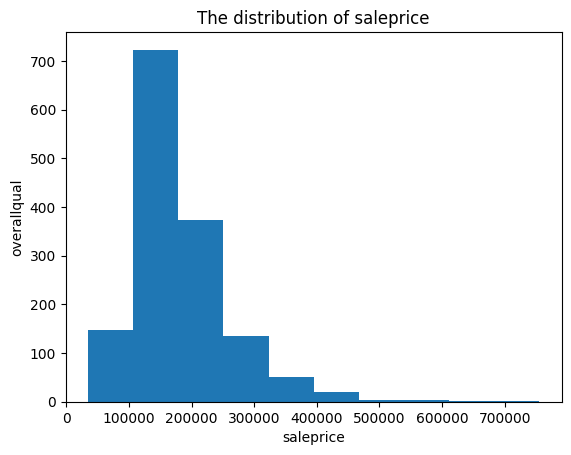

In [ ]:
plt.hist(insurance_df.saleprice)
plt.title("The distribution of saleprice")
plt.xlabel("saleprice")
plt.ylabel("overallqual")
plt.show()

In [ ]:
insurance_df["is_street_pave"] = pd.get_dummies(insurance_df.street, drop_first=True)
insurance_df["is_centralair"] = pd.get_dummies(insurance_df.centralair, drop_first=True)
#street
#utilities
#centralair
#fullbath

In [ ]:
# Look at the values in the categorical feature
insurance_df['fullbath'].value_counts()

2    768
1    650
3     33
0      9
Name: fullbath, dtype: int64

In [ ]:
fullbath_df = pd.get_dummies(insurance_df['fullbath'])
fullbath_df.head()

,0,1,2,3
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [ ]:
new_df = insurance_df.drop(['fullbath'], axis =1).merge(fullbath_df,left_index=True, right_index=True)
new_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,yrsold,saletype,salecondition,saleprice,is_street_pave,is_centralair,0,1,2,3
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,1,1,0,0,1,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,1,1,0,0,1,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,1,1,0,0,1,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,1,1,0,1,0,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,1,1,0,0,1,0


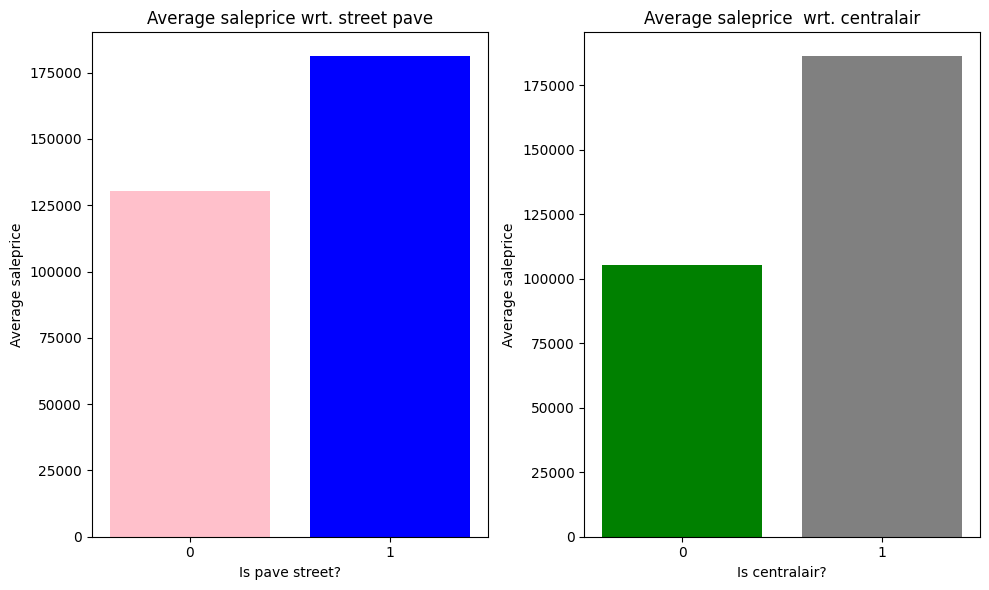

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(insurance_df.groupby("is_street_pave")["saleprice"].mean().index, insurance_df.groupby("is_street_pave")["saleprice"].mean(),
       color=("pink","blue"))
plt.title("Average saleprice wrt. street pave")
plt.ylabel("Average saleprice")
plt.xlabel("Is pave street?")
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(insurance_df.groupby("is_centralair")["saleprice"].mean().index, insurance_df.groupby("is_centralair")["saleprice"].mean(),
       color=("green","grey"))
plt.title("Average saleprice  wrt. centralair")
plt.ylabel("Average saleprice")
plt.xlabel("Is centralair?")
plt.xticks([0,1])

plt.tight_layout()
plt.show()


In [ ]:
# `Y` is the target variable
Y = insurance_df['saleprice']
# `X` is the feature set which includes the
# `is_male` and `is_smoker` variables
X = insurance_df[['is_street_pave','is_centralair']]

# Create a `LinearRegression` model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# Fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [29284.71527228 80391.93189983]

Intercept: 
 76595.87873344858


In [ ]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     49.58
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.48e-21
Time:                        23:46:05   Log-Likelihood:                -18496.
No. Observations:                1460   AIC:                         3.700e+04
Df Residuals:                    1457   BIC:                         3.701e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            7.66e+04   3.19e+04      2.403      0.016    1.41e+04    1.39e+05
is_street_pave  2.928e+04   3.15e+04      0.928      0.353   -3.26e+04    9.12e+04
is_centralair   8.039e+04   8182.098      9.825      0.000    6.43e+04    9.64e+04
==============================================================================
Omnibus:                      650.899   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4067.146
Skew:                           1.988   Prob(JB):                         0.00
Kurtosis:                      10.145   Cond. No.                         37.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""